#Index - 190494A
#Name - Ranasinghe K K H

#1

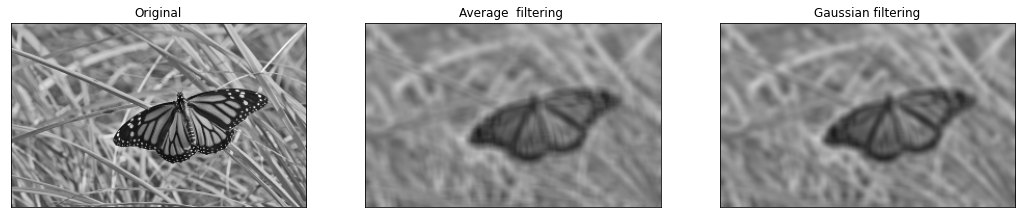

In [157]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#load image and convert to RGB
img = cv.imread("butterfly.jpg",cv.IMREAD_REDUCED_GRAYSCALE_4)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
if img is None:
    print("Image could not be read")
    assert False
#create kernel
kernel = np.ones((9,9))/81
img_box = cv.filter2D(img,-1,kernel)#Average filtering 
img_gaussian = cv.GaussianBlur(img,(9,9),sigmaX=4,sigmaY=4)#Gaussian filtering
#plot
fig,ax = plt.subplots(1,3,figsize=(18,6))
ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_xticks([]),ax[0].set_yticks([])
ax[0].set_title("Original")
ax[1].imshow(img_box,cmap='gray',vmin=0,vmax=255)
ax[1].set_xticks([]),ax[1].set_yticks([])
ax[1].set_title("Average  filtering ")
ax[2].imshow(img_gaussian,cmap='gray',vmin=0,vmax=255)
ax[2].set_xticks([]),ax[2].set_yticks([])
ax[2].set_title("Gaussian filtering")
plt.show()
plt()
#jbhdfujuhikj

#2

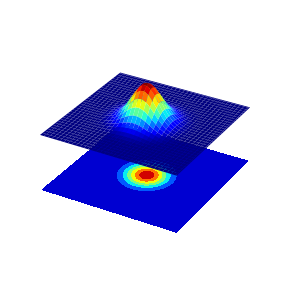

In [173]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

#Create a Gaussian kernel
sigma = 1
step=0.1
x = np.arange(-5,5+step,step)
y = np.arange(-5,5+step,step)
X,Y = np.meshgrid(x,y)
Z = np.exp(-(x**2+Y**2)/(2*sigma**2))

#plot
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111,projection='3d')
surf = ax.plot_surface(X,Y,Z,cmap=cm.jet)

cset = ax.contourf(X,Y,Z ,zdir='z',offset=np.min(Z)-1.5,cmap=cm.jet)
ax.set_zlim(np.min(Z) - 2, np.max(Z))
plt.axis('off')
plt.show()




#3

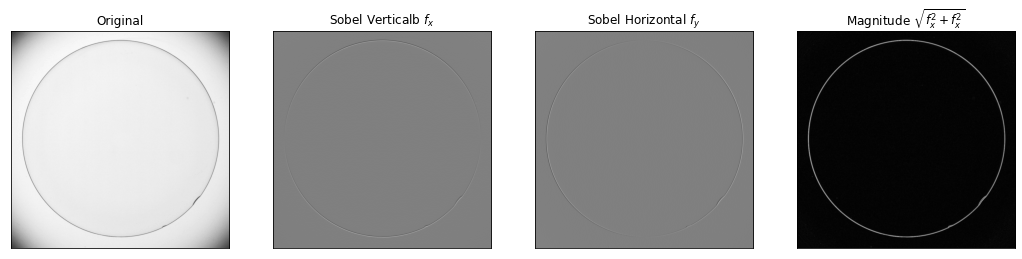

In [155]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
#load image
img = cv.imread("contact_lens.tif",cv.IMREAD_GRAYSCALE).astype(np.float32)

kernel_vertical = np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype=np.float32)#create Sobel vertical kernel
img_vertical =  cv.filter2D(img,-1,kernel_vertical)#sobel vertical filtering

kernel_horizontal = np.array([(-1,0,1),(-2,0,2),(-1,0,1)],dtype=np.float32)#create Sobel horizontal kernel
img_horizontal =  cv.filter2D(img,-1,kernel_horizontal)#sobel horizontal filtering
#calculate magnitude
magnitude = np.hypot(img_vertical, img_horizontal)

#plot
fig,ax=plt.subplots(1,4,figsize=(18,10))
ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_xticks([]),ax[0].set_yticks([])
ax[0].set_title("Original")
ax[1].imshow(img_vertical,cmap='gray',vmin=-1020,vmax=1020)
ax[1].set_xticks([]),ax[1].set_yticks([])
ax[1].set_title("Sobel Verticalb $f_x$")
ax[2].imshow(img_horizontal,cmap='gray',vmin=-1020,vmax=1020)
ax[2].set_xticks([]),ax[2].set_yticks([])
ax[2].set_title("Sobel Horizontal $f_y$")
ax[3].imshow(magnitude,cmap='gray')
ax[3].set_xticks([]),ax[3].set_yticks([])
ax[3].set_title(r"Magnitude $\sqrt{f_x^2+f_x^2}$")
plt.show()




#4

Text(0.5, 1.0, 'Sharped')

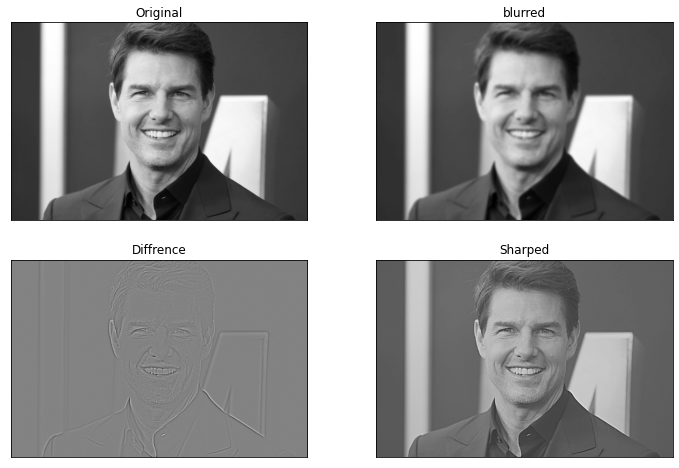

In [163]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
#load image
img = cv.imread("tom.jpg",cv.IMREAD_GRAYSCALE).astype(np.float32)
gau_kernel=cv.getGaussianKernel(7,3)
img_blur= cv.sepFilter2D(img,-1,gau_kernel,gau_kernel)
diffrence = img.astype("float32")-img_blur.astype("float32")#get difference between original image and blurred image

img_sharp = cv.addWeighted(img.astype('float32') , 1.0, diffrence, 1.4, 0)#add diffrence to original image

#plot
fig,ax=plt.subplots(2,2,figsize=(12,8))
ax[0][0].imshow(img,cmap='gray')
ax[0][0].set_xticks([]),ax[0][0].set_yticks([])
ax[0][0].set_title("Original")
ax[0][1].imshow(img_blur,cmap='gray')
ax[0][1].set_xticks([]),ax[0][1].set_yticks([])
ax[0][1].set_title("blurred")
ax[1][0].imshow(diffrence,cmap='gray')
ax[1][0].set_xticks([]),ax[1][0].set_yticks([])
ax[1][0].set_title("Diffrence")
ax[1][1].imshow(img_sharp,cmap='gray')
ax[1][1].set_xticks([]),ax[1][1].set_yticks([])
ax[1][1].set_title("Sharped")